# Payal - Data Analyst: Basic Visuals

### Objective
The primary objective of this notebook is to demonstrate a complete workflow for cleaning, analyzing, and visualizing a car dataset. The focus is on understanding the relationships between various car features (such as price, horsepower, engine size, and fuel type) and extracting actionable insights for data-driven decision-making.

### Inputs
- **Raw Dataset:** A CSV file containing car data with various features (e.g., price, horsepower, engine size, fuel type, etc.).
- **Encoded Dataset (`df`, `df_filled`):** Handling of missing/negative values.
- **Cleaned Categorical Dataset (`df_stage1`):** Used for visualizations that require original categorical variables (e.g., top 10 car makes by average price, engine size vs. price by fuel type).

### Outputs
- **Cleaned DataFrames:** 
    - `df`: Raw data with missing and negative values.
    - `df_filled`: Cleaned data with negative values replaced by column medians.
    - `df_stage1`: Cleaned data with categorical variables preserved for visualization.
- **Visualizations:**
    - Bar plot for average Car Price by Brand.
    - Scatter plots showing relationships between Car Price and Engine Size by Fuel Type.
    - Pie chart of fuel type distribution using plotly.
- **Insights:** Markdown summaries after each visualization, highlighting key findings and trends.

### Additional Comments
- The notebook emphasizes proper data cleaning, especially handling negative and missing values by replacing them with medians to maintain data integrity.
- The workflow is modular, with clear separation between data loading, cleaning, visualization, and interpretation.
- The notebook saves cleaned datasets for reproducibility and downstream analysis, making it suitable for both exploratory data analysis and as a foundation for further modeling or reporting.

----
### **1. importing necessary libraries**

In [1]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np


-----
### **2. Load and Preview the Dataset**

- The dataset is loaded from a CSV file into a pandas DataFrame named `df`.
- The shape of the dataset is displayed to show the number of rows and columns.
- The first few rows of the dataset are shown for a quick preview.


In [2]:
df = pd.read_csv("../data/final_cleaned_dataset.csv")

print("Dataset loaded with shape:", df.shape)
df.head()

Dataset loaded with shape: (205, 16)


,price_per_cc,curbweight,horsepower,highwaympg,enginesize,citympg,carwidth,wheelbase,carlength,boreratio,car_id,stroke,carheight,fuelsystem_2bbl,fuelsystem_mpfi,price
0,0.123893,-0.014566,0.174483,-0.546059,0.074449,-0.646553,-0.844782,-1.690772,-0.426521,0.519071,-1.723622,-1.839377,-2.020417,-0.689072,1.08667,13495.0
1,0.831337,-0.014566,0.174483,-0.546059,0.074449,-0.646553,-0.844782,-1.690772,-0.426521,0.519071,-1.706724,-1.839377,-2.020417,-0.689072,1.08667,16500.0
2,0.269112,0.514882,1.264536,-0.691627,0.604046,-0.953012,-0.190566,-0.708596,-0.231513,-2.404880,-1.689826,0.685946,-0.543527,-0.689072,1.08667,16500.0
3,0.863735,-0.420797,-0.053668,-0.109354,-0.431076,-0.186865,0.136542,0.173698,0.207256,-0.517266,-1.672928,0.462183,0.235942,-0.689072,1.08667,13950.0
4,0.873748,0.516807,0.275883,-1.273900,0.218885,-1.106241,0.230001,0.107110,0.207256,-0.517266,-1.656029,0.462183,0.235942,-0.689072,1.08667,17450.0


------
### **3. Handling Negative Values in the Dataset**

- Replacing negative values with zero was not appropriate for this dataset, as zero is not a meaningful value for most columns and would have skewed the data and distorted visualizations.
- Instead, I replaced negative values with the column median, which helps preserve the overall distribution and integrity of the data while handling invalid entries more appropriately.
- Saving the new data set as cleaned_final_for _power_bi.csv

In [3]:
# Replace all negative values with NaN
df[df < 0] = np.nan

# Fill NaN values with column median
df_filled = df.fillna(df.median(numeric_only=True))

# Try saving to a new file name to avoid PermissionError
df_filled.to_csv("../data/cleaned_dataset_for_power_bi.csv", index=False)
print("✅ Cleaned dataset saved as 'cleaned_dataset_for_power_bi.csv' with median values replacing invalid entries.")

✅ Cleaned dataset saved as 'cleaned_dataset_for_power_bi.csv' with median values replacing invalid entries.


In [17]:
df_filled.head()

,price_per_cc,curbweight,horsepower,highwaympg,enginesize,citympg,carwidth,wheelbase,carlength,boreratio,car_id,stroke,carheight,fuelsystem_2bbl,fuelsystem_mpfi,price
0,0.123893,0.939403,0.174483,0.83684,0.074449,0.88574,0.603839,0.789639,1.019791,0.519071,0.861811,0.462183,0.728239,1.451227,1.08667,13495.0
1,0.831337,0.939403,0.174483,0.83684,0.074449,0.88574,0.603839,0.789639,1.019791,0.519071,0.861811,0.462183,0.728239,1.451227,1.08667,16500.0
2,0.269112,0.514882,1.264536,0.83684,0.604046,0.88574,0.603839,0.789639,1.019791,0.963216,0.861811,0.685946,0.728239,1.451227,1.08667,16500.0
3,0.863735,0.939403,0.782885,0.83684,0.604046,0.88574,0.136542,0.173698,0.207256,0.963216,0.861811,0.462183,0.235942,1.451227,1.08667,13950.0
4,0.873748,0.516807,0.275883,0.83684,0.218885,0.88574,0.230001,0.107110,0.207256,0.963216,0.861811,0.462183,0.235942,1.451227,1.08667,17450.0


----
#### **4. Using Cleaned Categorical Data for Visualization**
In the following visualizations, I will be using the **cleaned_data_stage1** dataset (`df_stage1`). This version of the data preserves the original categorical variables, making it ideal for generating insightful and interpretable plots related to car features and pricing.

In [ ]:
df_stage1 = pd.read_csv("../data/cleaned_data_stage1.csv")
print("✅ cleaned_data_stage1 loaded with shape:", df_stage1.shape)
df_stage1.head()

✅ cleaned_data_stage1 loaded with shape: (205, 27)


,car_id,symboling,carname,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,price_per_cc
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,103.807692
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,126.923077
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,108.552632
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,127.981651
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,128.308824


-----
### **5. Average Car Price by Brand**

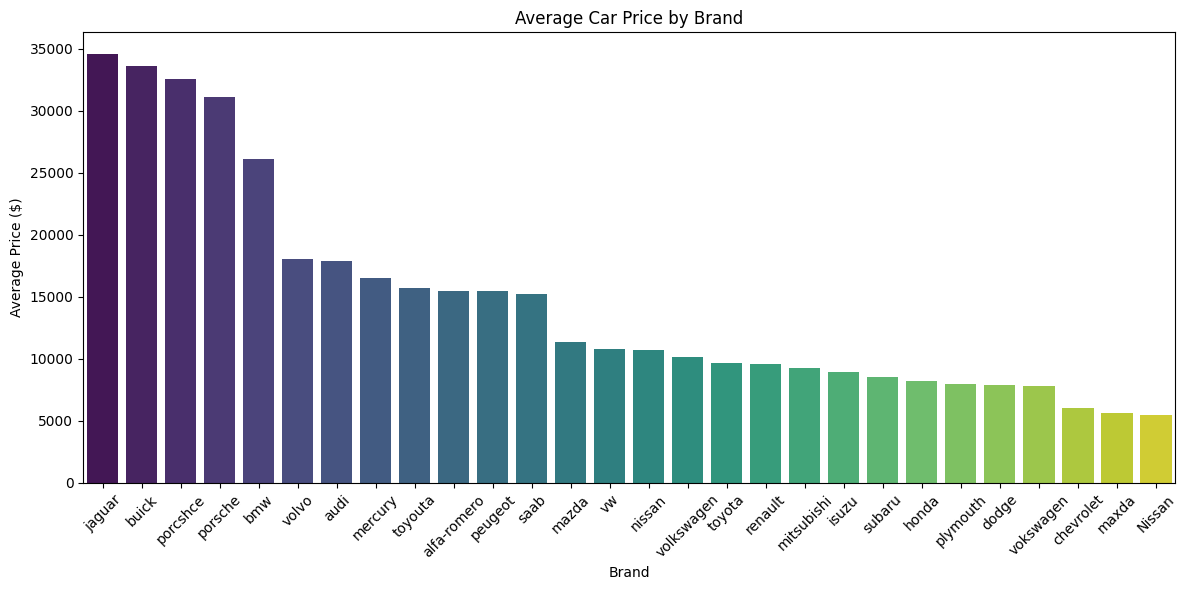

In [31]:
# Calculate the average price by car brand and sort in descending order
avg_price_by_make = df_stage1.groupby('make', as_index=False)['price'].mean().sort_values(by='price', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=avg_price_by_make, x='make', y='price', hue= 'make', palette='viridis', legend=False)
plt.xticks(rotation=45)
plt.title('Average Car Price by Brand')
plt.xlabel('Brand')
plt.ylabel('Average Price ($)')
plt.tight_layout()
plt.show()


### **Insights**

- The bar chart of average car price by brand reveals significant variation in pricing across different manufacturers. 
- Luxury brands such as Jaguar, Buick, Porsche, and BMW command the highest average prices, indicating their focus on premium vehicles. 
- In contrast, brands like Nissan, Maxda, and Chevrolet have much lower average prices, reflecting their emphasis on affordability and mass-market appeal.
- This distribution highlights the segmentation of the car market, with clear distinctions between luxury and economy brands. 
- Additionally, the presence of both well-known and less common brands in the top 10 suggests that brand reputation and market positioning play a crucial role in pricing strategies.

----
### **6. Pie chart of fuel type distribution using plotly**

In [ ]:
# check the fuel type distribution
df_stage1['fueltype'].value_counts()

fueltype
gas       185
diesel     20
Name: count, dtype: int64

In [54]:
import plotly.express as px

# Assuming you have a DataFrame named df with a 'fueltype' column
fig = px.pie(df_stage1, names='fueltype', title='Fuel Type Distribution')
fig.update_layout(width=600, height=400, legend=dict(
        bgcolor='white',         # Background color of legend
        bordercolor='grey',     # Border color
        borderwidth=2            # Border thickness (in pixels)
    ))

fig.show()

### **Insights**
- This pie chart visualizes the distribution of different fuel types in the dataset.
- I used Plotly to create a clean, interactive pie chart that shows the proportion of cars powered by each fuel type (e.g., petrol, diesel). 
- Understanding the fuel type breakdown helps us analyze trends in pricing, engine performance, and market preferences across fuel variants.

---
### **7. Car Price vs. Engine Size by Fuel Type**

In [38]:
import plotly.express as px

fig = px.scatter(
    df_stage1,
    x="enginesize",
    y="price",
    color="fueltype",
    hover_data=["carname", "make"],
    title="Car Price vs. Engine Size",
    labels={"enginesize": "Engine Size (cc)", "price": "Price ($)", "fueltype": "Fuel Type"},
    color_discrete_map=fueltype_colors
)
fig.show()

### **Insights**
- There is a general upward trend: as engine size increases, car prices tend to rise.
- Based on my finding here in the scatter plot with the fuel types based on Gas and Diesel with Gas being in blue and diesel in red with the exact prices found based on the engine size of each car.
- Gasoline vehicles dominate the lower engine-size and price segments.
- Diesel cars, though fewer in number, tend to cluster at higher engine sizes and sometimes higher prices.
- Outliers may indicate luxury or high-performance vehicles.

---
### **Notebook Summary**
- This notebook presented a complete data analysis workflow, starting from loading and cleaning raw car data to creating insightful visualizations and extracting key trends.
- By handling missing and negative values thoughtfully, we ensured the integrity of the dataset.
- Visual exploration revealed how features like brand, engine size, and fuel type influence car prices.
- The analysis highlighted clear market segmentation between luxury and economy brands, as well as differences in fuel type distributions. 
- Additional advanced visualizations and dashboard designs have been implemented using Power BI for enhanced interactivity and reporting.

---